In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
contract_loan = pd.read_csv('contract_loan.csv', delimiter=',')
contract_loan

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,2020-07-20T03:17:26.386,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,2020-07-20T03:59:54.196,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,2020-07-20T06:25:04.957,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,2020-07-20T07:57:41.168,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,2020-07-20T09:29:54.100,ACTIVE,4,3017500,500.0,0.0,3018000.0
...,...,...,...,...,...,...,...,...
95,bmmv1,2020-07-20T05:22:16.253,FINISHED,3,3000000,900549.6,639950.4,3900549.6
96,sgzag,2020-07-20T04:48:10.818,FINISHED,3,3000000,900549.6,639950.4,3900549.6
97,ujcr5,2020-07-20T05:04:14.907,FINISHED,3,3000000,900549.6,639950.4,3900549.6
98,aw1fx,2020-07-20T04:14:44.416,FINISHED,3,3000000,900549.6,639950.4,3900549.6


In [3]:
contract_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   contract_id      100 non-null    object 
 1   created_at       100 non-null    object 
 2   contract_status  100 non-null    object 
 3   tenure           100 non-null    int64  
 4   loan_amount      100 non-null    int64  
 5   provision        100 non-null    float64
 6   interest         100 non-null    float64
 7   principal        100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


<Axes: xlabel='principal', ylabel='created_at'>

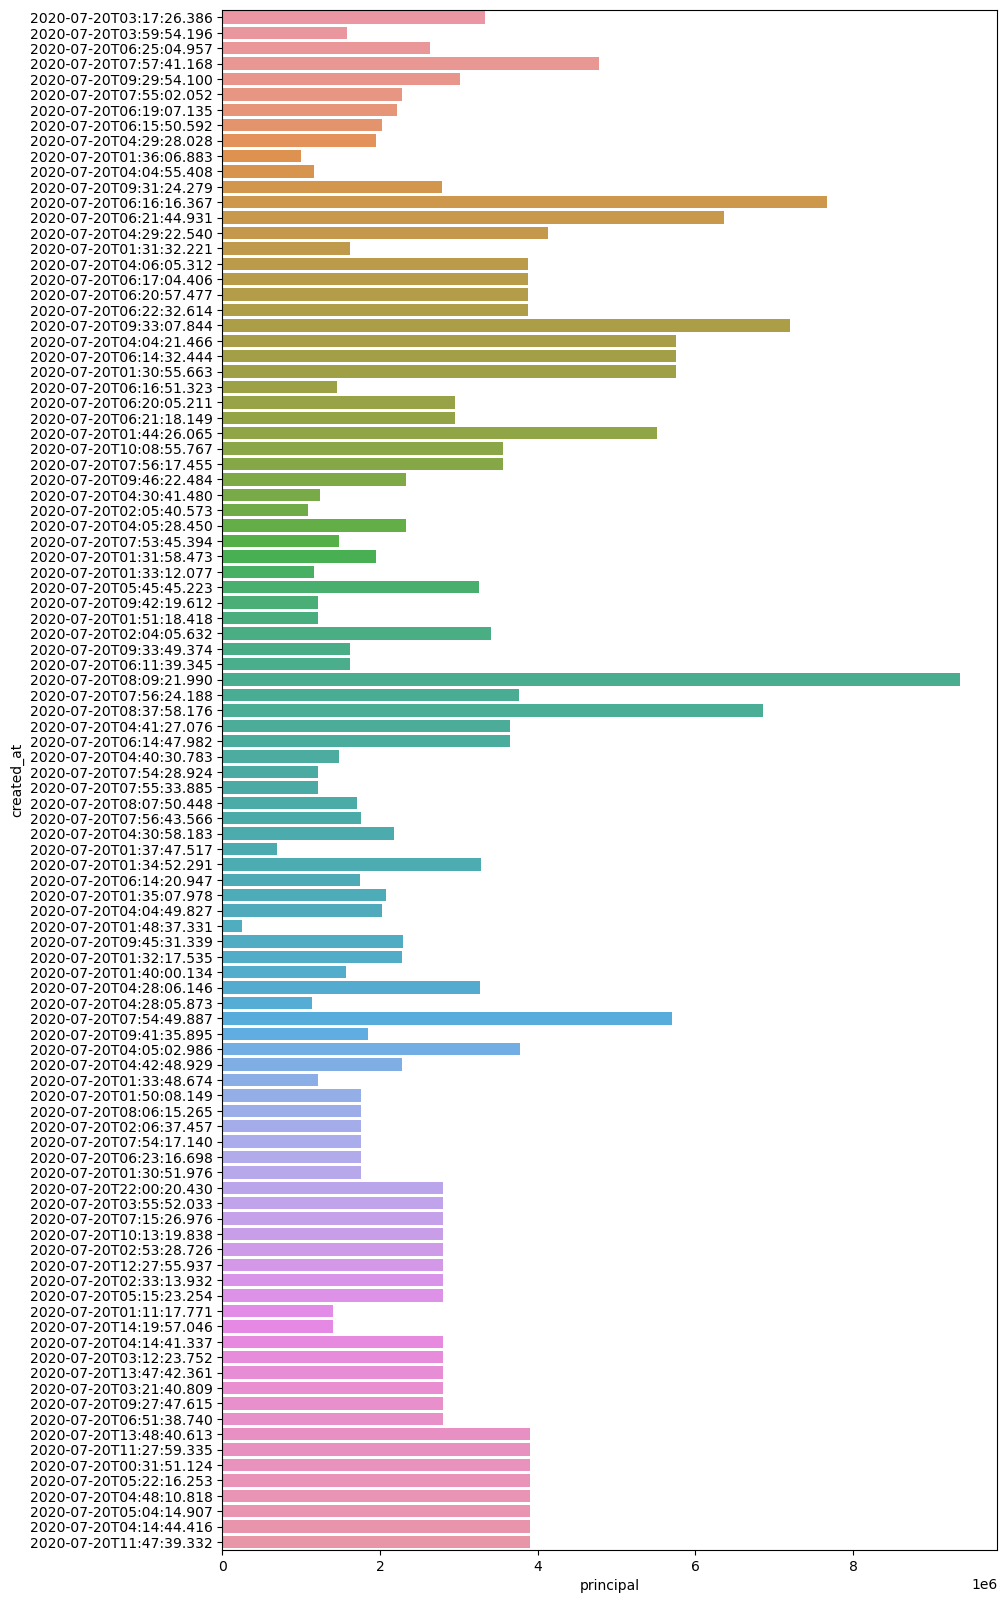

In [4]:
plt.figure(figsize=(10,20))
sns.barplot(data=contract_loan,x='principal',y='created_at')

In [5]:
contract_loan['created_at'] = pd.to_datetime(contract_loan['created_at'])
contract_loan['created_at'] = contract_loan['created_at'].dt.strftime("%H:%M:%S")

In [6]:
contract_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   contract_id      100 non-null    object 
 1   created_at       100 non-null    object 
 2   contract_status  100 non-null    object 
 3   tenure           100 non-null    int64  
 4   loan_amount      100 non-null    int64  
 5   provision        100 non-null    float64
 6   interest         100 non-null    float64
 7   principal        100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


In [7]:
contract_loan.head()

,contract_id,created_at,contract_status,tenure,loan_amount,provision,interest,principal
0,w7azu,03:17:26,ACTIVE,5,3332500,0.0,0.0,3332500.0
1,lsm5s,03:59:54,ACTIVE,5,1587500,1500.0,0.0,1587500.0
2,x5p6i,06:25:04,ACTIVE,6,2639500,500.0,0.0,2640000.0
3,s7cj4,07:57:41,ACTIVE,6,4775500,500.0,0.0,4776000.0
4,gr9qh,09:29:54,ACTIVE,4,3017500,500.0,0.0,3018000.0


In [8]:
contract_loan['principal'].mean()

2884613.200000001

In [9]:
principal_time = DataFrame(contract_loan[['created_at','principal']])
principal_time

,created_at,principal
0,03:17:26,3332500.0
1,03:59:54,1587500.0
2,06:25:04,2640000.0
3,07:57:41,4776000.0
4,09:29:54,3018000.0
...,...,...
95,05:22:16,3900549.6
96,04:48:10,3900549.6
97,05:04:14,3900549.6
98,04:14:44,3900549.6


In [10]:
principal_time = principal_time.set_index('created_at')
principal_time

,principal
created_at,
03:17:26,3332500.0
03:59:54,1587500.0
06:25:04,2640000.0
07:57:41,4776000.0
09:29:54,3018000.0
...,...
05:22:16,3900549.6
04:48:10,3900549.6
05:04:14,3900549.6


In [11]:
principal_time['principal'] = principal_time['principal'].astype('float')

Text(0.5, 1.0, 'Time when the principal is above the averge amount')

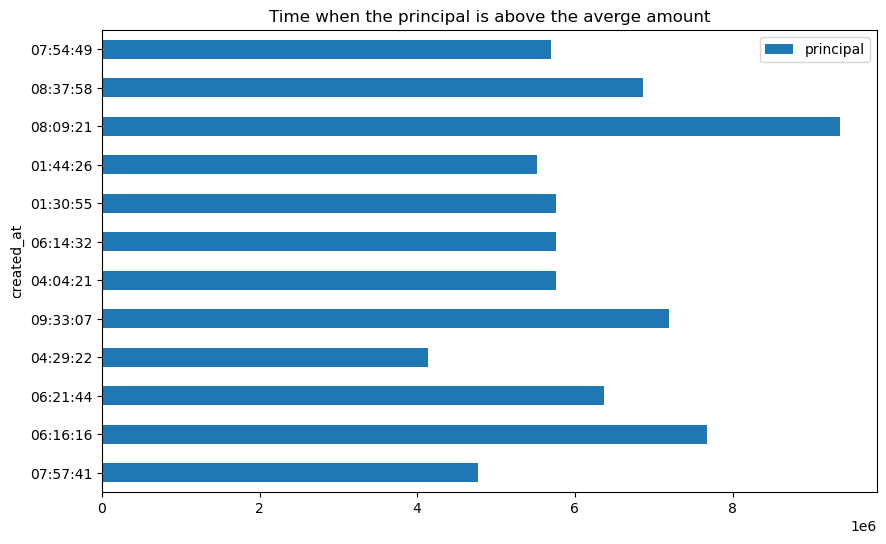

In [12]:
principal_time[principal_time['principal'] > 4000000].plot(kind='barh', figsize=(10,6))
plt.title('Time when the principal is above the averge amount')

In [19]:
contract_ledger = pd.read_csv('contract_loan_ledger.csv').value_counts()
contract_ledger

ledger_id  contract_id  created_at               period  ledger_type  ledger_status  initial_balance  balance  due_date                 paid_off_date          
00q7jho    wrv68        2020-07-20T09:33:49.369  2       PRINCIPAL    PAID           270000.0         0.0      2020-09-20T16:59:59.999  2020-09-25T12:21:53        1
ntdzi27    jo3e8        2020-07-20T09:41:35.890  1       INTEREST     PAID           0.0              0.0      2020-08-20T16:59:59.999  2020-08-24T06:06:56        1
pa2jheq    ujcr5        2020-07-20T05:04:14.909  1       PRINCIPAL    PAID           1201500.0        0.0      2020-08-20T16:59:59.000  2020-08-15T05:42:54        1
p7iwzn6    ts3ry        2020-08-23T17:09:09.454  1       LATE_FEE     WAIVED         950000.0         0.0      2020-08-20T16:59:59.999  2020-09-29T03:19:32.427    1
oxxh9ew    ah9kw        2020-07-20T10:13:19.840  1       PRINCIPAL    PAID           862500.0         0.0      2020-08-20T16:59:59.000  2020-08-20T00:54:15        1
               

In [21]:
contract_late = pd.read_excel('contract_late.xlsx')
contract_late.head()

,contract_id,ledger_type,ledger_status,initial_balance,balance
0,7ozx8,LATE_FEE,UNPAID,315000,315000
1,7n9v2,LATE_FEE,UNPAID,630000,630000
2,dqrk5,LATE_FEE,UNPAID,309000,309000
3,nqglk,LATE_FEE,UNPAID,247000,247000
4,0h6b6,LATE_FEE,UNPAID,315000,315000


<Axes: title={'center': 'Contract Loan with Late Fee Ledger Type'}, xlabel='Count', ylabel='contract_id'>

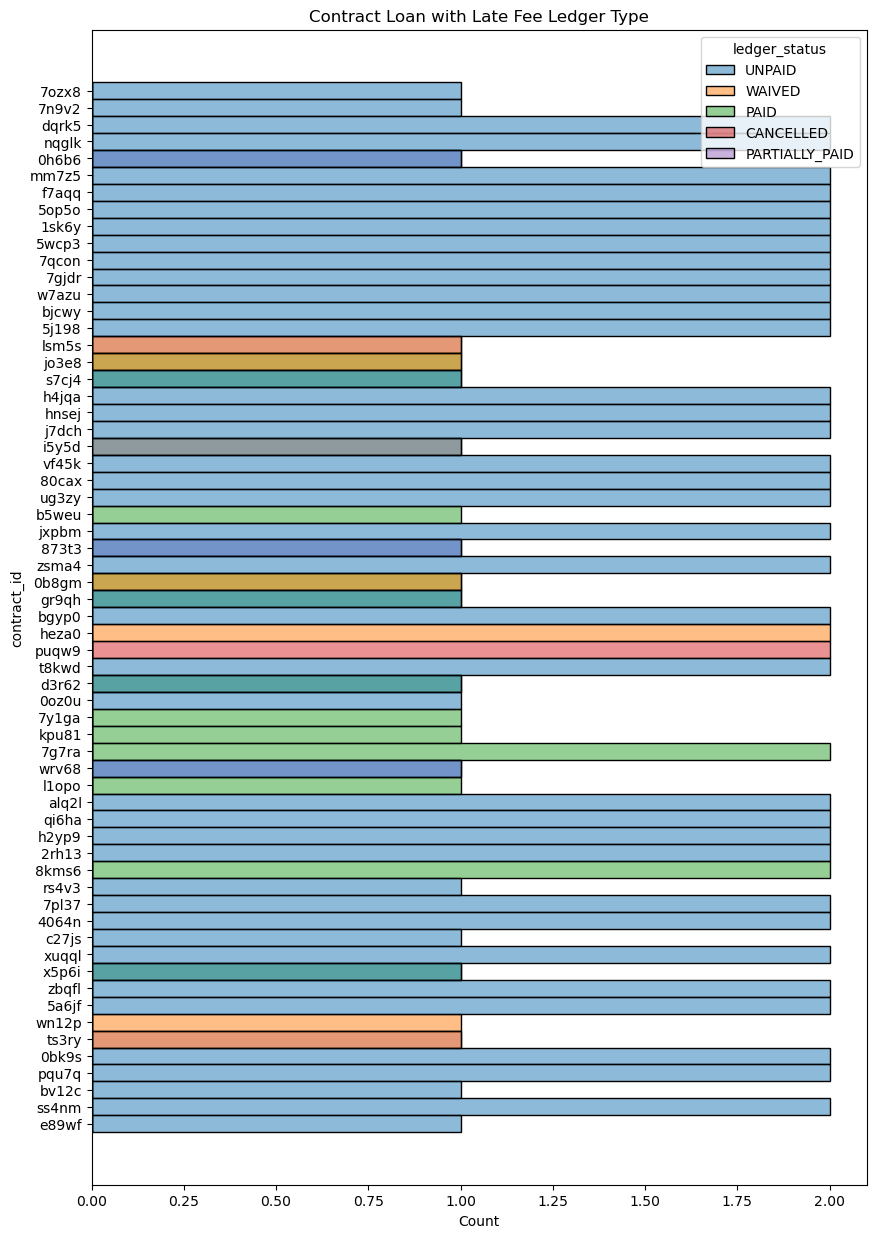

In [69]:
plt.figure(figsize=(10,15))
plt.title('Contract Loan with Late Fee Ledger Type')
sns.histplot(data=contract_late, y='contract_id', hue='ledger_status')

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
contract_late['contract_id'].value_counts()

contract_id
bgyp0    2
ts3ry    2
873t3    2
zsma4    2
0b8gm    2
gr9qh    2
heza0    2
puqw9    2
t8kwd    2
d3r62    2
pqu7q    2
0bk9s    2
7g7ra    2
ss4nm    2
wrv68    2
alq2l    2
qi6ha    2
h2yp9    2
2rh13    2
8kms6    2
5a6jf    2
7pl37    2
4064n    2
zbqfl    2
x5p6i    2
jxpbm    2
ug3zy    2
80cax    2
dqrk5    2
nqglk    2
0h6b6    2
mm7z5    2
f7aqq    2
5op5o    2
1sk6y    2
5wcp3    2
7qcon    2
7gjdr    2
w7azu    2
bjcwy    2
5j198    2
lsm5s    2
jo3e8    2
s7cj4    2
h4jqa    2
hnsej    2
j7dch    2
i5y5d    2
vf45k    2
xuqql    2
wn12p    1
bv12c    1
7ozx8    1
c27js    1
rs4v3    1
l1opo    1
kpu81    1
7y1ga    1
0oz0u    1
7n9v2    1
b5weu    1
e89wf    1
Name: count, dtype: int64

Text(0.5, 0, 'Occurrences')

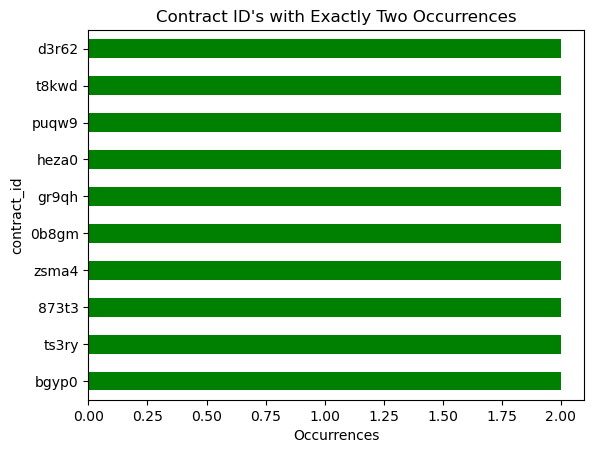

In [104]:
contract_counts = contract_late['contract_id'].value_counts()[:10]
contract_twice = contract_counts[contract_counts == 2]
contract_twice.plot(kind='barh', color='green')
plt.title("Contract ID's with Exactly Two Occurrences")
plt.xlabel('Occurrences')

In [105]:
contract_late['contract_id'].count()

112

In [106]:
due_date_payment = pd.read_excel('due_date_payment.xlsx')
due_date_payment.head()

,contract_id,ledger_type,ledger_status,due_date,paid_off_date
0,a3182,PRINCIPAL,PAID,2020-08-20 16:59:59.999,2020-08-20 04:29:47
1,0oz0u,PRINCIPAL,PAID,2020-08-20 16:59:59.999,2020-08-20 02:24:56
2,75muz,PRINCIPAL,PAID,2020-08-20 16:59:59.999,2020-07-20 10:01:29
3,ah9kw,INTEREST,PAID,2020-08-20 16:59:59.000,2020-08-20 00:54:15
4,z4ypq,INTEREST,PAID,2020-09-20 16:59:59.999,2020-09-20 01:09:17


In [108]:
due_date_payment.count()

contract_id      48
ledger_type      48
ledger_status    48
due_date         48
paid_off_date    48
dtype: int64

In [109]:
due_date_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   contract_id    48 non-null     object        
 1   ledger_type    48 non-null     object        
 2   ledger_status  48 non-null     object        
 3   due_date       48 non-null     datetime64[ns]
 4   paid_off_date  48 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 2.0+ KB


In [113]:
due_date_payment['due_date'] = pd.to_datetime(due_date_payment['due_date'])
due_date_payment['paid_off_date'] = pd.to_datetime(due_date_payment['paid_off_date'])

due_date_payment['due_date'] = due_date_payment['due_date'].dt.strftime('%Y-%m-%d')
due_date_payment['paid_off_date'] = due_date_payment['paid_off_date'].dt.strftime('%Y-%m-%d')

In [118]:
due_date_payment

,contract_id,ledger_type,ledger_status,due_date,paid_off_date
0,a3182,PRINCIPAL,PAID,2020-08-20,2020-08-20
1,0oz0u,PRINCIPAL,PAID,2020-08-20,2020-08-20
2,75muz,PRINCIPAL,PAID,2020-08-20,2020-07-20
3,ah9kw,INTEREST,PAID,2020-08-20,2020-08-20
4,z4ypq,INTEREST,PAID,2020-09-20,2020-09-20
5,uvcur,INTEREST,PAID,2020-08-20,2020-08-20
6,dtxll,PRINCIPAL,PAID,2020-09-21,2020-09-21
7,ah9kw,INTEREST,PAID,2020-09-20,2020-09-20
8,ah9kw,PRINCIPAL,PAID,2020-09-20,2020-09-20
9,fhua4,PRINCIPAL,PAID,2020-09-20,2020-09-20


In [117]:
due_date_payment['contract_id'].value_counts()

contract_id
46vj4    4
ah9kw    4
z4ypq    4
uvcur    4
dtxll    4
fhua4    4
7ozx8    2
fipap    2
56qqc    2
trpyf    2
jb3yv    2
a3182    2
bv12c    2
7kvun    2
0oz0u    2
c27js    2
75muz    2
tugaf    2
Name: count, dtype: int64